<a href="https://colab.research.google.com/github/Firizki17/Pengolahan-Citra-Digital/blob/main/Muh_Firizki_2226270024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muh Firizki

NPM  : 2226270024

UTS  : Pengolahan Citra Digital

---



## Soal 1

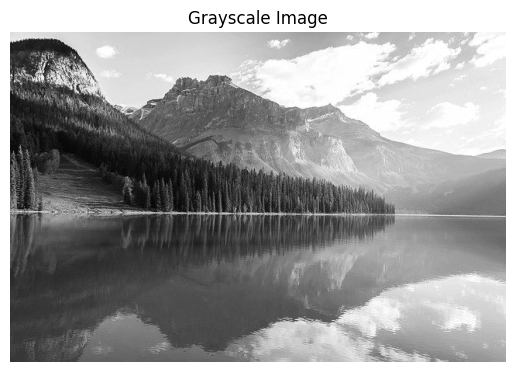

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

url = "https://www.dinastindopratama.com/wp-content/uploads/2020/05/GrayScale-Mountain.jpg"

response = requests.get(url, stream=True).content
image_np = np.frombuffer(response, np.uint8)
gambar_1 = cv2.imdecode(image_np, cv2.IMREAD_GRAYSCALE)

plt.imshow(gambar_1, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


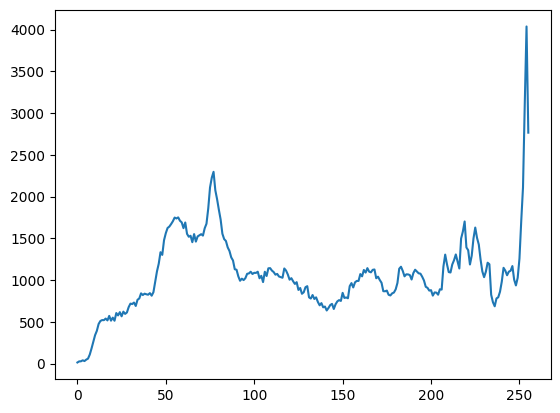

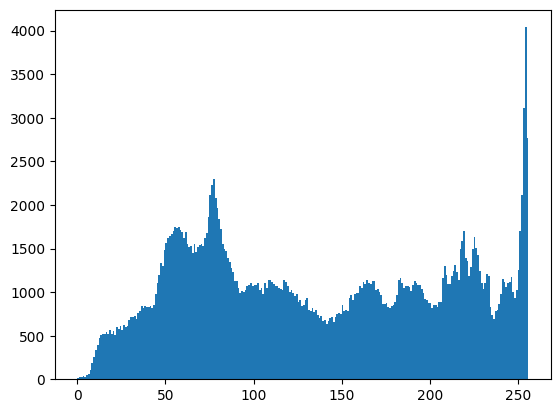

In [2]:
histr = cv2.calcHist([gambar_1],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

histg = cv2.calcHist([gambar_1],[0],None,[256],[0,256])
plt.hist(gambar_1.ravel(),256,[0,256])
plt.show()

Histogram Equalization

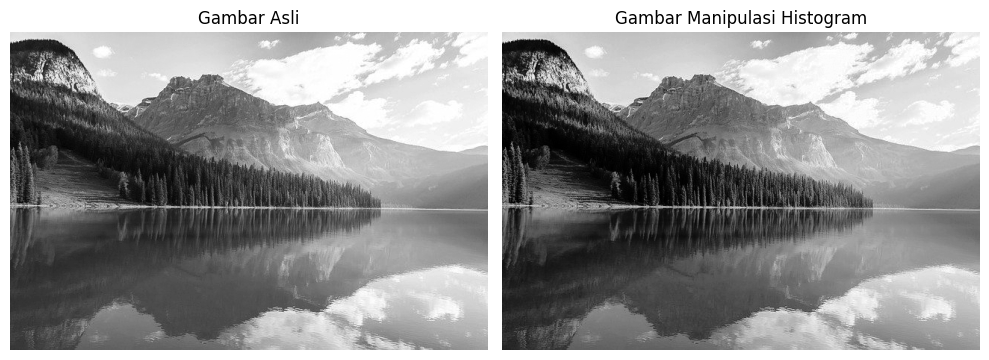

In [3]:
gambar_1 = cv2.imdecode(image_np, cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(gambar_1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gambar_1, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Gambar Manipulasi Histogram")
plt.axis('off')

plt.tight_layout()
plt.show()

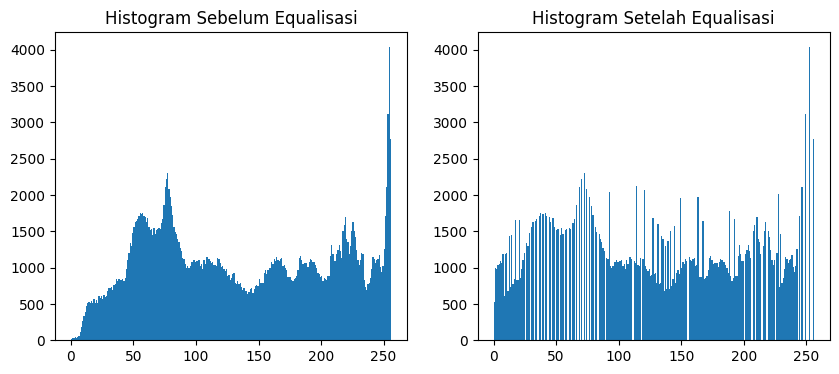

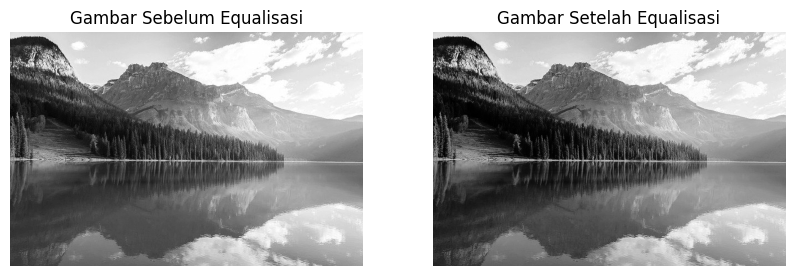

In [4]:
gambar_equalized = cv2.equalizeHist(gambar_1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(gambar_1.ravel(), bins=256, range=[0, 256])
plt.title("Histogram Sebelum Equalisasi")

plt.subplot(1, 2, 2)
plt.hist(gambar_equalized.ravel(), bins=256, range=[0, 256])
plt.title("Histogram Setelah Equalisasi")
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gambar_1, cmap='gray')
plt.title("Gambar Sebelum Equalisasi")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gambar_equalized, cmap='gray')
plt.title("Gambar Setelah Equalisasi")
plt.axis('off')
plt.show()

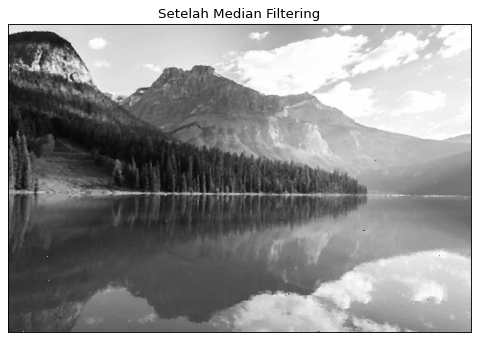

In [5]:
s_and_p = np.random.rand(gambar_1.shape[0], gambar_1.shape[1])

threshold = 0.05
noisy = gambar_1.copy()
noisy[s_and_p < threshold] = 0
noisy[s_and_p > 1 - threshold] = 255

Med = cv2.medianBlur(noisy, 3)
fig = plt.figure(figsize=(20, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(122)
plt.imshow(Med, cmap='gray')
plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('Setelah Median Filtering')

plt.show()

Frequency Gaussian Filter

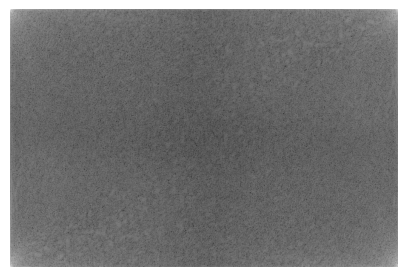

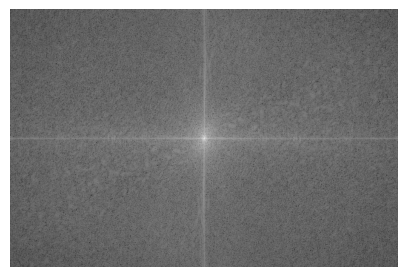

In [6]:
F = np.fft.fft2(gambar_1)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5, 5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

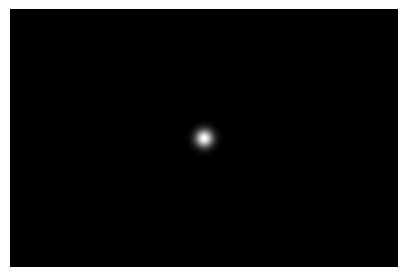

In [7]:
M, N = gambar_1.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M / 2)**2 + (v - N / 2)**2)
        H[u, v] = np.exp(-D**2 / (2 * D0 * D0))

plt.figure(figsize=(5, 5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

Low Pass Filter

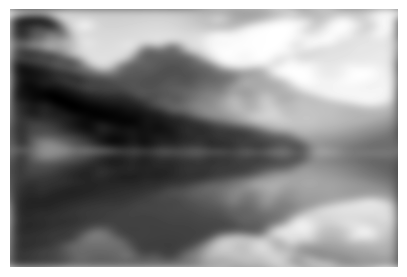

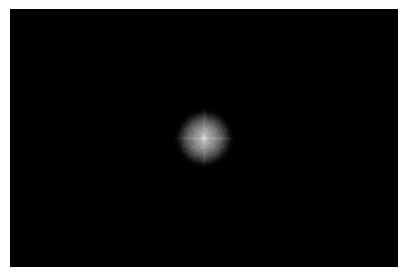

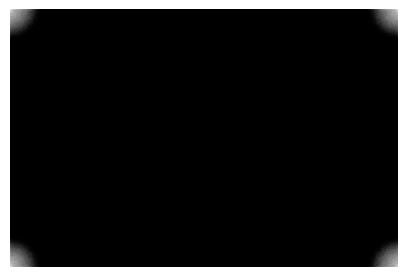

In [8]:
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

High Pass Filter

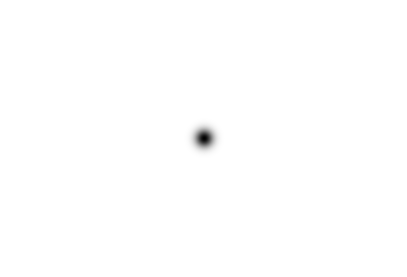

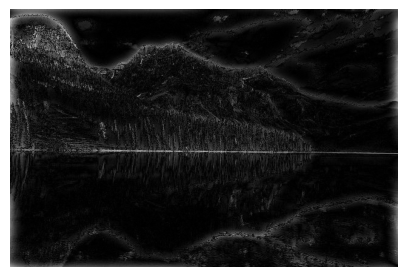

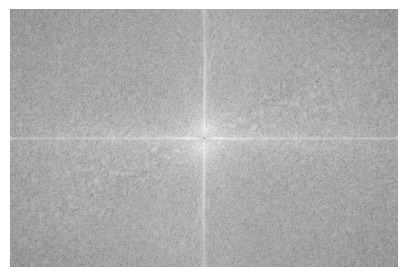

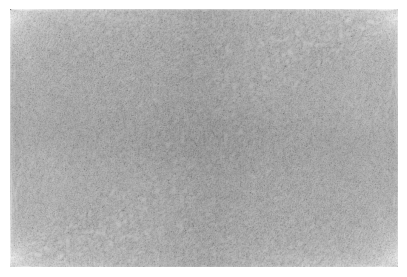

In [9]:
HPF = 1 - H

plt.figure(figsize=(5, 5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

# Image Filters - High Pass Filter
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()


## Soal 2

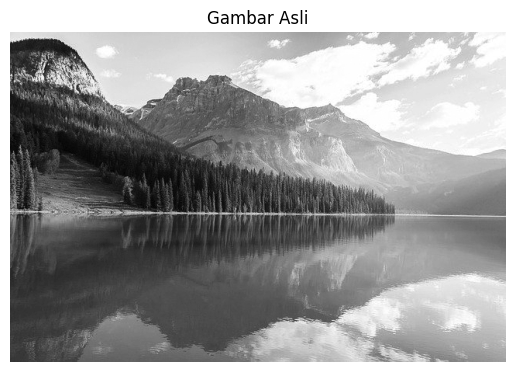

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

url = "https://www.dinastindopratama.com/wp-content/uploads/2020/05/GrayScale-Mountain.jpg"

response = requests.get(url, stream=True).content
image_np = np.frombuffer(response, np.uint8)
gambar_1 = cv2.imdecode(image_np, cv2.IMREAD_GRAYSCALE)

plt.imshow(gambar_1, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')
plt.show()

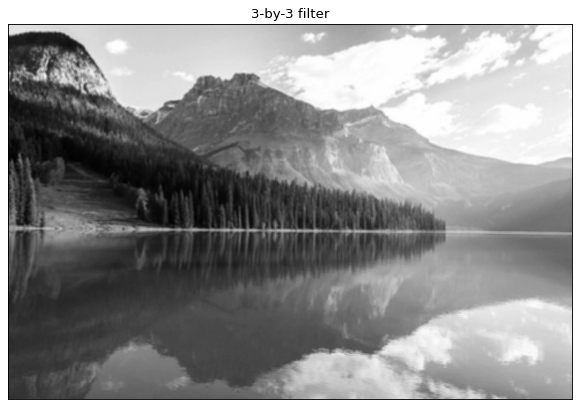

In [11]:
kernel_3 = np.ones((3, 3), np.float32) / 9
filtered_3 = cv2.filter2D(gambar_1, -1, kernel_3)

filtered_3_gray = filtered_3
fig = plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.imshow(filtered_3_gray, cmap='gray')
plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

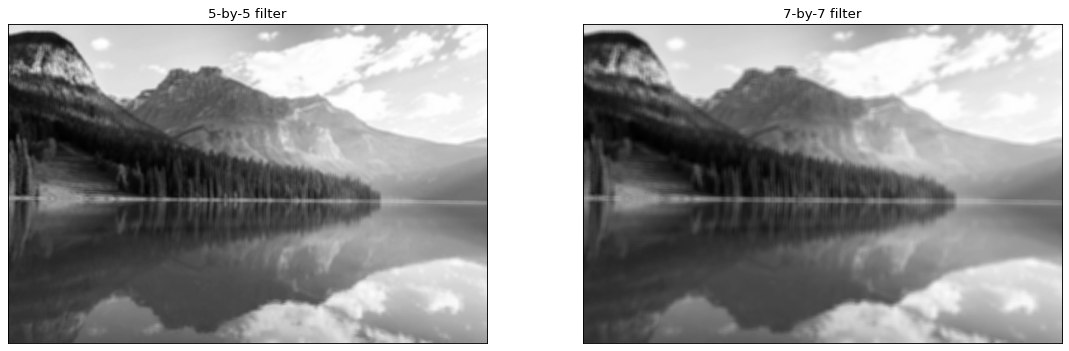

In [12]:
kernel_5 = np.ones((5, 5), np.float32) / 25
kernel_7 = np.ones((7, 7), np.float32) / 49

filtered_5 = cv2.filter2D(gambar_1, -1, kernel_5)
filtered_7 = cv2.filter2D(gambar_1, -1, kernel_7)

fig = plt.figure(figsize=(17, 17), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.imshow(filtered_5, cmap='gray')
plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(filtered_7, cmap='gray')
plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

Dengan menggunakan kernel rata-rata berukuran 3x3, 5x5, dan 7x7, kode ini bertujuan untuk memperlihatkan efek dari berbagai ukuran kernel dalam menghaluskan citra. Kernel yang lebih besar cenderung memberikan efek penghalusan yang lebih kuat tetapi juga dapat mengakibatkan hilangnya detail lebih banyak dalam citra. Hasil dari proses ini dapat digunakan untuk membandingkan seberapa efektif setiap kernel dalam mengurangi noise dan menghaluskan citra.